# Introdução


Este notebook é a resolução do problemas propostos no [arquivo](Programa_e.pdf), onde o método de Bairstow será utilizado para encontrar raizes de alguns polinômios teste e será momstrado também o respectivo fractal de Bairstow, no qual consiste em fazer uma varredura nos chutes iniciais de 'r' e 's' - que são parâmetros do método - para identificar possíveis regiões em que o método não converge ou possui rápida convergência 

Segue link do [repositório no github](https://github.com/igorsbs/metodos_numericos/tree/main) com os programas propostos pela matéria.

## Bibliotecas necessárias para rodar o programa

In [68]:
import pandas as pd                 # Para armazenar dados em dataframe e gerar arquivos .csv com os resultado dos fractaisi de Bairstow
import matplotlib.pyplot as plt     # Para fazer os gráficos 
import numpy as np                  # Para lidar com listas e vetores de números e ter acesso a funções trancendentais

# Método de Bairstow

O método de Bairstow é uma algoritmo para encontrar zero de função de polinômios através da deflação do polinômio original por um polinômio de segundo grau, de tal forma que é possível encontrar tanto raízes reais quanto raízes complexas, em que o resto da divisão seja nulo, assim o polinômio diivisor possui duas raíizes do polinômio original.

O método consiste de um algoritmo iterativo para encontrar o polinômio divisor para que anule o resto da divisão que possui 2 parâmetros: 'r' e 's'.

### Definição da função que implementa o método de Bairstow

In [69]:
def bairstow(poly, r, s, tol=1e-6, max_iter=999):
    """
    Encontra as raízes de um polinômio usando o método de Bairstow.

    Args:
        poly: lista de coeficientes do polinômio, do maior grau para o menor (ex: [1, -3, -7, 27, -18])
        r, s: chutes iniciais para o método
        tol: tolerância para convergência
        max_iter: número máximo de iterações

    Returns:
        Lista de raízes (reais ou complexas)
    """

    def solve_quadratic(r, s):
        """Resolve x^2 - rx - s = 0"""
        D = r**2 + 4*s
        sqrt_D = np.sqrt(D + 0j)
        if D > 0:
            return [(r + sqrt_D) / 2, (r - sqrt_D) / 2]
        else:
            i_1 = abs(D)**0.5/2
            return [r/2+i_1*1j,r/2-i_1*1j]

    roots = []
    n = len(poly) - 1  # grau do polinômio
    a = poly[:]

    iter = 0
    while n >= 3:
        for _ in range(max_iter):
            b = [0] * (n + 1)
            c = [0] * (n + 1)

            b[n] = a[n]
            b[n-1] = a[n-1] + r * b[n]
            
        
            for i in range(n-2, -1, -1):
                b[i] = a[i] + r * b[i+1] + s * b[i+2]
                # if iter == 1: print(b)
            c[n] = b[n]
            c[n-1] = b[n-1] + r * c[n]
            for i in range(n-2, 0, -1):
                c[i] = b[i] + r * c[i+1] + s * c[i+2]

            # Determinantes
            D = c[2]*c[2] - c[3]*c[1]
            if abs(D) < 1e-12:  # para evitar divisão por zero
                D = 1e-12

            dr = (-b[1]*c[2] + b[0]*c[3]) / D
            ds = (-b[0]*c[2] + b[1]*c[1]) / D
            

            r += dr
            s += ds

            iter += 1
            if iter >= 999:
                break
            
            if abs(dr/r)*100 < tol and abs(ds/s)*100 < tol:
                break
        else:
            print("Aviso: número máximo de iterações atingido")

        # Adiciona raízes do quadrático
        roots.extend(solve_quadratic(r, s))

        # Reduz o polinômio
        a = b[2:]  # Remove os dois últimos termos
        n -= 2

    if n == 2:
        r1, r2 = solve_quadratic(-a[1]/a[2], -a[0]/a[2])
        roots.extend([r1, r2])
    elif n == 1:
        roots.append(-a[0]/a[1])

    return roots, iter


## Polinômios de teste

A seguir serão demonstradas os 3 polinômios de teste, junto com a implementação do método de Bairstow para $r=s=-1$ como chutes iniciais e tolerância $0.01\%$. 

Polinômios: 
- Polinômio 1: $1x^5-25x^4+230x^3-950x^21689x-945$
- Polinômio 2: $1x^5 -3.5x^4 2.75x^3 2.125x^2 -3.875x 1.25$
- Polinômio 3: $x^5-1$

Poly 1 Roots: [(9.000000032749075+0j), (1.000000003045388+0j), (6.9994586938775045+0j), (2.999782447340073+0j), 5.000569182402661], Iterations: 13
Poly 2 Roots: [(0.5000000000000149+0j), (-1.000000000000004+0j), (0.9999999637515061+0.5000002249952171j), (0.9999999637515061-0.5000002249952171j), 1.9999835420425538], Iterations: 11
Poly 3 Roots: [(-0.8090169943828809+0.5877852523008493j), (-0.8090169943828809-0.5877852523008493j), (0.3090148506245712+0.9510568547463524j), (0.3090148506245712-0.9510568547463524j), 0.9999789741203386], Iterations: 275


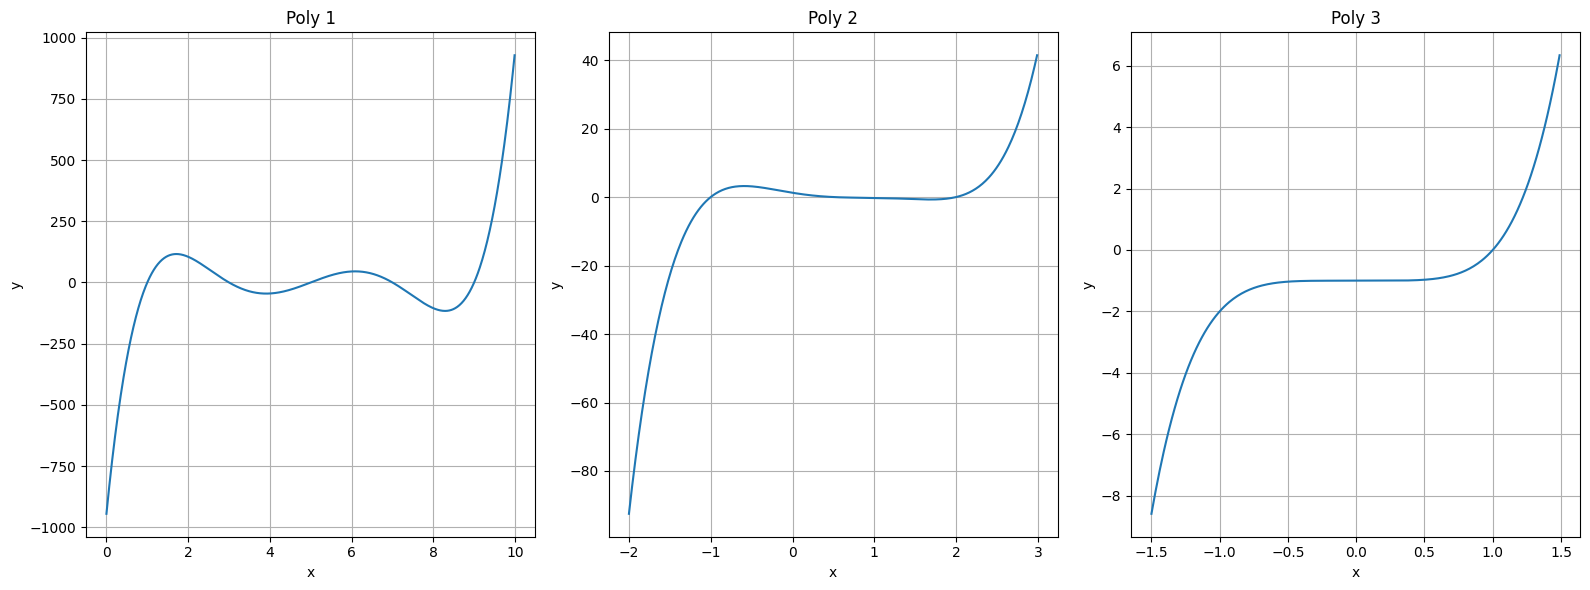

In [ ]:
def poly_calc(poly, x):
    """
    Calcula o valor de um polinômio em um ponto x.

    Args:
        poly: lista de coeficientes do polinômio, do maior grau para o menor.
              Exemplo: [1, -3, -7, 27, -18] representa P(x) = x⁴ - 3x³ - 7x² + 27x - 18
        x: valor no qual o polinômio será avaliado

    Returns:
        Valor numérico de P(x)
    """
    y = 0
    poly = poly[::-1]  # Inverte os coeficientes para ordem crescente (a₀ + a₁x + ... + aₙxⁿ)
    for i in range(len(poly)):
        y += poly[i] * x**i  # Soma termo a termo: aᵢ·xⁱ
    return y


polys = [
    [1,-25,230,-950,1689,-945],         # Polinômio 1
    [1, -3.5, 2.75, 2.125, -3.875, 1.25], # Polinômio 2
    [1,0,0,0,0,-1]                        # Polinômio 3 
]

x_range = [
    [0, 10],     # intervalo para o polinômio 1
    [-2, 3],     # intervalo para o polinômio 2
    [-1.5, 1.5]  # intervalo para o polinômio 3
]

r = -1   # chute inicial para r
s = -1   # chute inicial para s
tol = 0.01  # tolerância de convergência



plt.figure(figsize=(16,6))
for i in range(len((polys))):
    plt.subplot(1, 3, i+1)
    x_array = np.arange(x_range[i][0],x_range[i][1],0.01)
    plt.plot(x_array,[poly_calc(polys[i],x)for x in x_array])
    plt.title(f'Poly {i+1}')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
# Ajuste automático dos espaçamentos entre os subplots
plt.tight_layout()

# Calcula o valor das raizes e o número de iterações necessárias
for i in range(len((polys))):
    roots, iters = bairstow(polys[i][::-1],r,s,tol)
    print(f'Poly {i+1} Roots: {roots}, Iterations: {iters}')




# Fractais de Bairstow

### Fractal polinômio 1

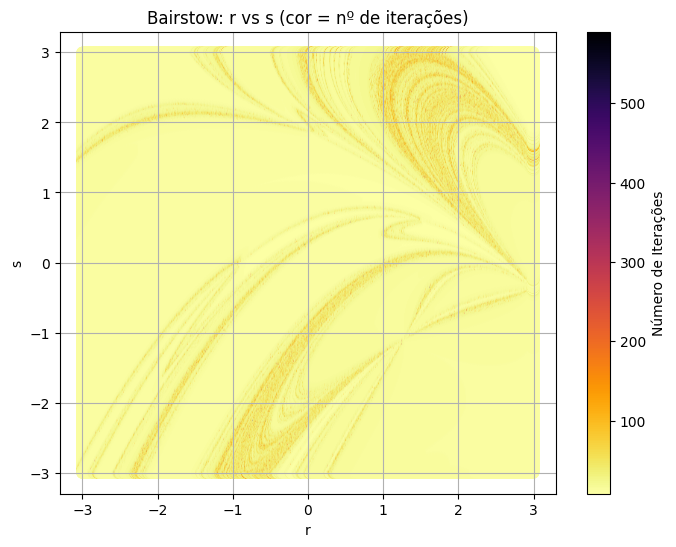

In [74]:
poly = [1,-25,230,-950,1689,-945]
poly = poly[::-1]

r = np.arange(-3,3,0.005)
s = np.arange(-3,3,0.005)

result_dict = {'r':[], 's':[], 'iter':[]}

for r_i in range(len(r)):
    for s_i in range(len(s)):
        root, iter = bairstow(poly,r[r_i],s[s_i],0.01)
        result_dict['r'].append(r[r_i])
        result_dict['s'].append(s[s_i])
        result_dict['iter'].append(iter)


# Salvando fractal em arquivo csv
result_df = pd.DataFrame(result_dict)
result_df.to_csv('Fractal_poly_1.csv', index=False)

        
# Scatter plot com colormap colorido
plt.figure(figsize=(8, 6))

sc = plt.scatter(result_dict['r'], result_dict['s'],
                 c=result_dict['iter'], cmap='inferno_r', s=60)

# Barra de cores
cbar = plt.colorbar(sc)
cbar.set_label('Número de Iterações')

plt.xlabel('r')
plt.ylabel('s')
plt.title('Bairstow: r vs s (cor = nº de iterações)')
plt.grid(True)
plt.show()


### Fractal polinômio 2

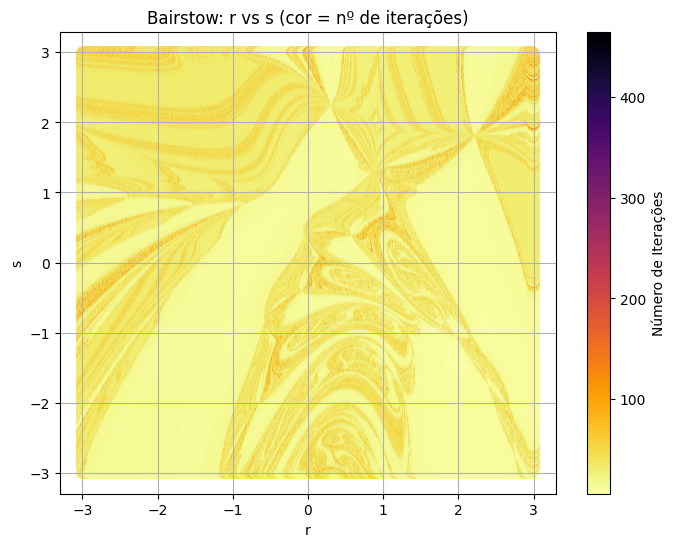

In [75]:
poly = [1, -3.5, 2.75, 2.125, -3.875, 1.25]
poly = poly[::-1]

r = np.arange(-3,3,0.005)
s = np.arange(-3,3,0.005)

result_dict = {'r':[], 's':[], 'iter':[]}

for r_i in range(len(r)):
    for s_i in range(len(s)):
        root, iter = bairstow(poly,r[r_i],s[s_i],0.01)
        result_dict['r'].append(r[r_i])
        result_dict['s'].append(s[s_i])
        result_dict['iter'].append(iter)


# Salvando fractal em arquivo csv
result_df = pd.DataFrame(result_dict)
result_df.to_csv('Fractal_poly_2.csv', index=False)

        
# Scatter plot com colormap colorido
plt.figure(figsize=(8, 6))

sc = plt.scatter(result_dict['r'], result_dict['s'],
                 c=result_dict['iter'], cmap='inferno_r', s=60)

# Barra de cores
cbar = plt.colorbar(sc)
cbar.set_label('Número de Iterações')

plt.xlabel('r')
plt.ylabel('s')
plt.title('Bairstow: r vs s (cor = nº de iterações)')
plt.grid(True)
plt.show()


### Fractal polinômio 3

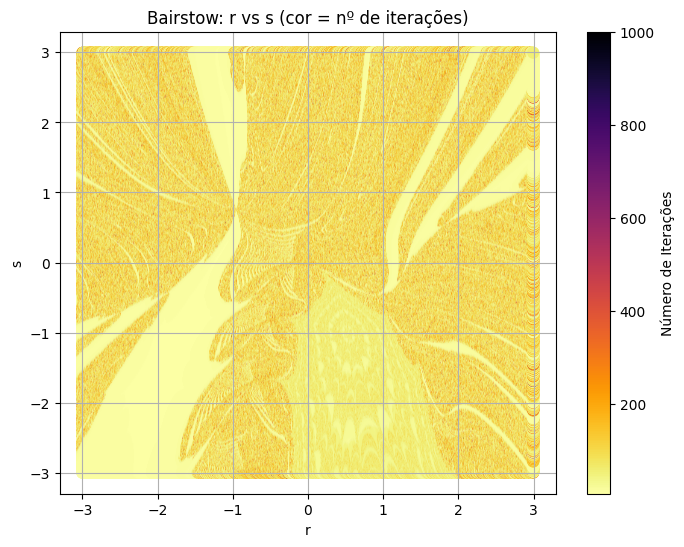

In [76]:
poly = [1,0,0,0,0,-1]
poly = poly[::-1]

r = np.arange(-3,3,0.005)
s = np.arange(-3,3,0.005)

result_dict = {'r':[], 's':[], 'iter':[]}

for r_i in range(len(r)):
    for s_i in range(len(s)):
        root, iter = bairstow(poly,r[r_i],s[s_i],0.01)
        result_dict['r'].append(r[r_i])
        result_dict['s'].append(s[s_i])
        result_dict['iter'].append(iter)


# Salvando fractal em arquivo csv
result_df = pd.DataFrame(result_dict)
result_df.to_csv('Fractal_poly_3.csv', index=False)

        
# Scatter plot com colormap colorido
plt.figure(figsize=(8, 6))

sc = plt.scatter(result_dict['r'], result_dict['s'],
                 c=result_dict['iter'], cmap='inferno_r', s=60)

# Barra de cores
cbar = plt.colorbar(sc)
cbar.set_label('Número de Iterações')

plt.xlabel('r')
plt.ylabel('s')
plt.title('Bairstow: r vs s (cor = nº de iterações)')
plt.grid(True)
plt.show()


# Conclusão

Foi possível perceber que o polinômio 3 possui mais regiões em que o método pode divergir entre os três polinômios de teste, apesar de possui boa região de convergência. De forma geral, os 3 polinômios são bemm estáveis do ponto de vista de convergência para chutes iniciais entre -3 e 3 de 'r' e 's'.